In [95]:
import numpy as np
import pandas as pd
import sklearn
import random
from random import sample
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HAM10000_metadata.csv')
df.head()
df['sex'] = df['sex'].astype('category')
df['dx'] = df['dx'].astype('category')
local_dmy = pd.get_dummies(df["localization"])
df_new = pd.concat([df, local_dmy], axis=1)
df_new.drop(columns = ["localization", "lesion_id", "image_id", "dx_type"], inplace=True)
df_new["sex"] = df['sex'].cat.codes
df_new["dx"] = df['dx'].cat.codes

In [3]:
df_new

,dx,age,sex,abdomen,acral,back,chest,ear,face,foot,genital,hand,lower extremity,neck,scalp,trunk,unknown,upper extremity
0,2,80.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,80.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,80.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,80.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,75.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,2,75.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,2,60.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,2,60.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,2,70.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,2,70.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


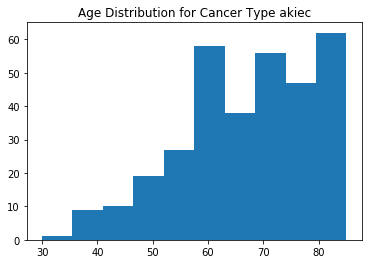

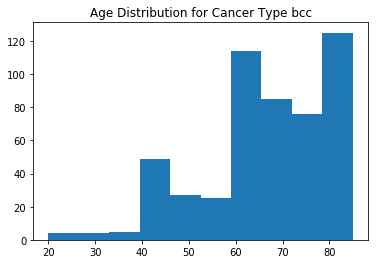

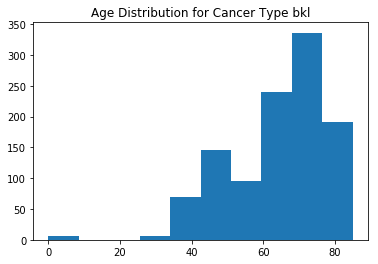

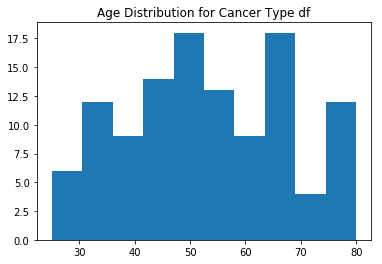

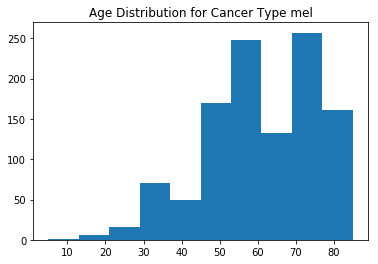

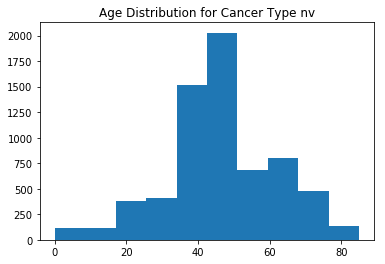

In [45]:
cancer_types = sorted(df['dx'].unique())
for i in range(6):
    plt.figure(500)
    age = df_new[df_new['dx']==i]['age']
    plt.hist(age)
    plt.title("Age Distribution for Cancer Type " + cancer_types[i])
    plt.show()

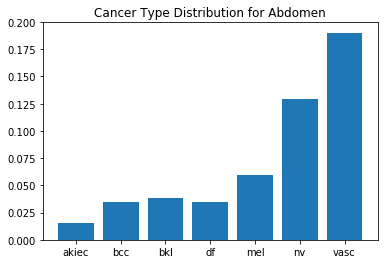

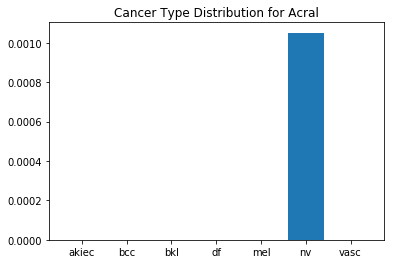

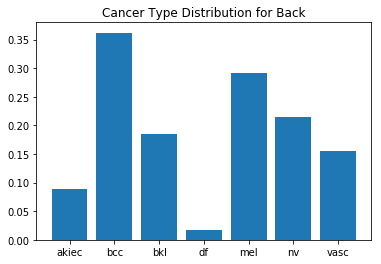

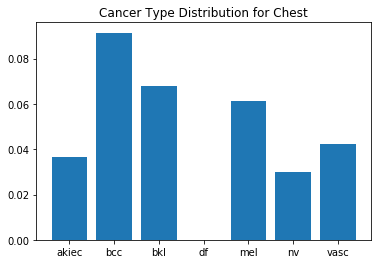

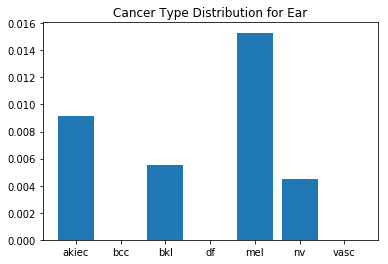

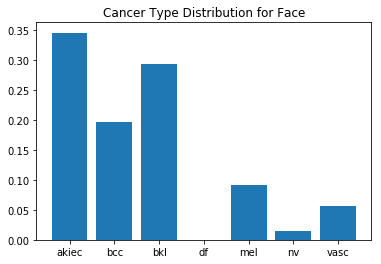

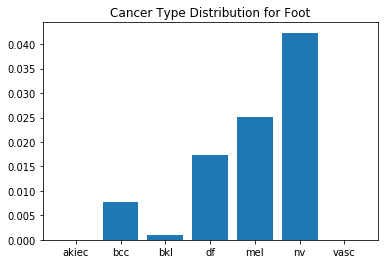

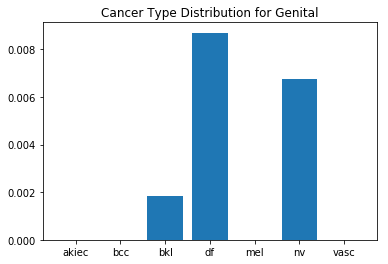

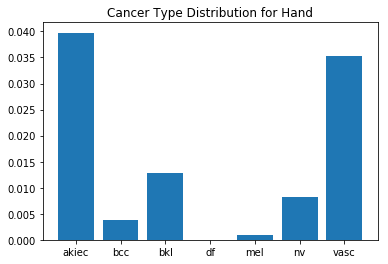

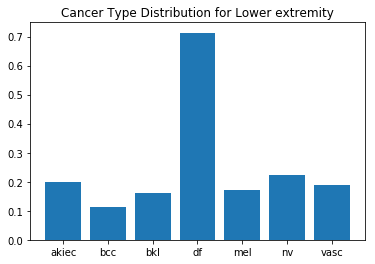

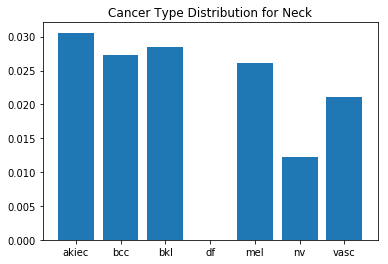

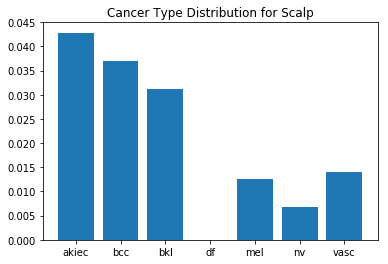

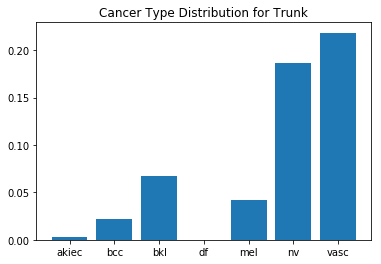

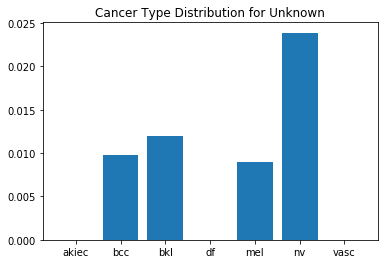

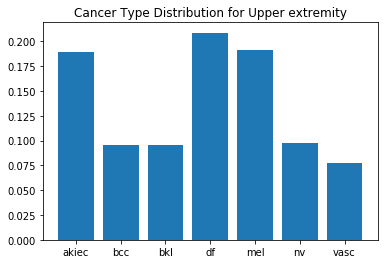

In [44]:
total_dx = df_new.groupby("dx").count()['age']
local_types = sorted(df['localization'].unique())
for part in local_types:
    plt.figure(500)
    dx = df_new[df_new[part]==True].groupby("dx").count()['age']
    proportion = []
    for i in range(7):
        if i in dx.index:
            proportion.append(dx[i]/total_dx[i])
        else: 
            proportion.append(0) 
    plt.bar(cancer_types, proportion)
    plt.title("Cancer Type Distribution for "+  part.capitalize())
    plt.show()

In [137]:
random.seed(12345)
train_index = sample(range(len(df_new)), int(9*len(df_new)/10))
test_index = [i for i in range(len(df_new)) if i not in train_index]
df_new.dropna(inplace=True)
df_np = np.array(df_new)
y_train = [df_np[i][0] for i in train_index]
x_train = [df_np[i][1:] for i in train_index]
y_test = [df_np[i][0] for i in test_index]
x_test = [df_np[i][1:] for i in test_index]
clf = RFC(n_estimators=200, max_depth=7, class_weight="balanced")
clf.fit(x_train, y_train)

pred_test = clf.predict(x_test)
pred_train = clf.predict(x_train)
cm_test = confusion_matrix(pred_test, y_test)
cm_train = confusion_matrix(pred_train, y_train)
correct_test = sum(cm_test[i,i] for i in range(len(cm_test)))
correct_train = sum(cm_train[i,i] for i in range(len(cm_train)))
print("Test Error: ", correct_test/sum(sum(cm_test)), "Training Error: ", correct_train/sum(sum(cm_train)))

Test Error:  0.4568273092369478 Training Error:  0.46295469761214014


In [138]:
svm_clf = SVC(C=1.0, gamma="auto", cache_size=200, class_weight="balanced")
svm_clf.fit(x_train, y_train)
pred_test = svm_clf.predict(x_test)
pred_train = svm_clf.predict(x_train)
cm_test = confusion_matrix(pred_test, y_test)
cm_train = confusion_matrix(pred_train, y_train)
correct_test = sum(cm_test[i,i] for i in range(len(cm_test)))
correct_train = sum(cm_train[i,i] for i in range(len(cm_train)))
print("Test Error: ", correct_test/sum(sum(cm_test)), "Training Error: ", correct_train/sum(sum(cm_train)))

Test Error:  0.4166666666666667 Training Error:  0.4239009149743361


In [140]:
cm_train

array([[ 159,   89,  264,    3,  163,  154,    9],
       [  32,  188,  192,    2,  198,  299,    5],
       [  11,   22,  134,    0,   42,  150,    4],
       [  63,   58,  156,   92,  204, 1255,   12],
       [  11,   17,   37,    0,   87,  187,    1],
       [  11,   49,   91,    6,  161, 3060,   12],
       [  11,   46,  107,    2,  131,  896,   79]])